# Resumo AI

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd


## Tipos de matrizes de transformação:

2 dimensoes

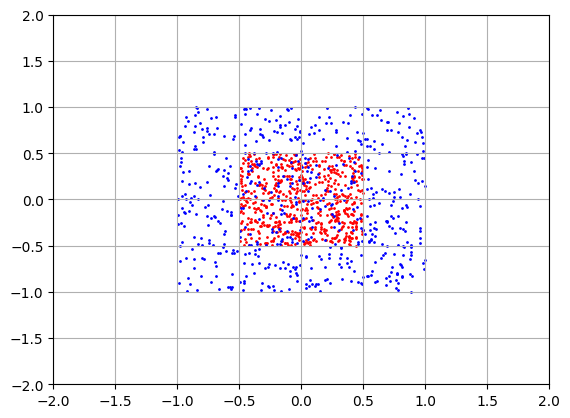

In [28]:
aumenta_tamanho = np.array([ [2, 0], [0, 2] ]) #Aumenta o tamanho do eixo y --> de -1 ate 1

x = np.random.uniform(-0.5, 0.5, size=(2, 600))

y = aumenta_tamanho @ x
plt.figure()
plt.scatter(x[0,:], x[1,:], s=1, c='r')
plt.scatter(y[0,:], y[1,:], s=1, c='b')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.grid()
plt.show()

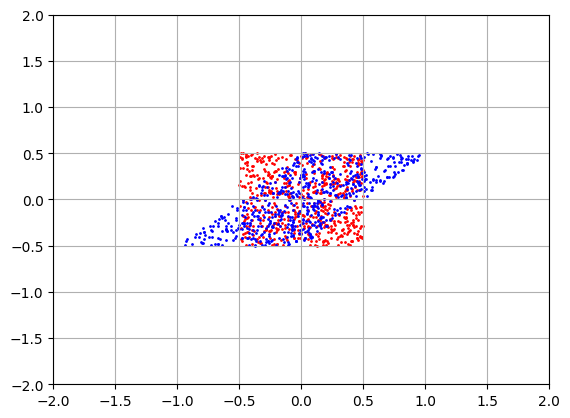

In [29]:
cisalha_x = np.array([ [1, 1], [0, 1] ]) #Cisalha em relacao ao eixo x

x = np.random.uniform(-0.5, 0.5, size=(2, 600))

y = cisalha_x @ x
plt.figure()
plt.scatter(x[0,:], x[1,:], s=1, c='r')
plt.scatter(y[0,:], y[1,:], s=1, c='b')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.grid()
plt.show()

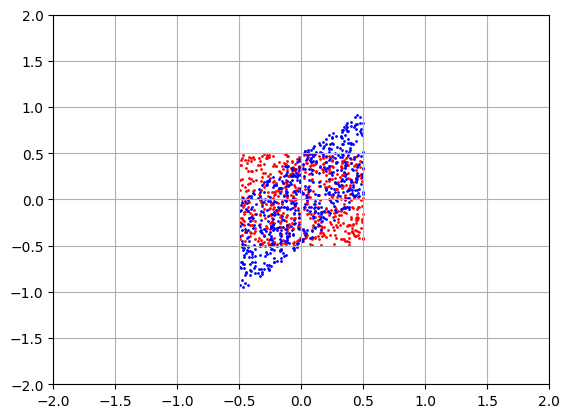

In [30]:
cisalha_y = np.array([ [1, 0], [1, 1] ]) #Cisalha em relacao ao eixo y

x = np.random.uniform(-0.5, 0.5, size=(2, 600))

y = cisalha_y @ x
plt.figure()
plt.scatter(x[0,:], x[1,:], s=1, c='r')
plt.scatter(y[0,:], y[1,:], s=1, c='b')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.grid()
plt.show()

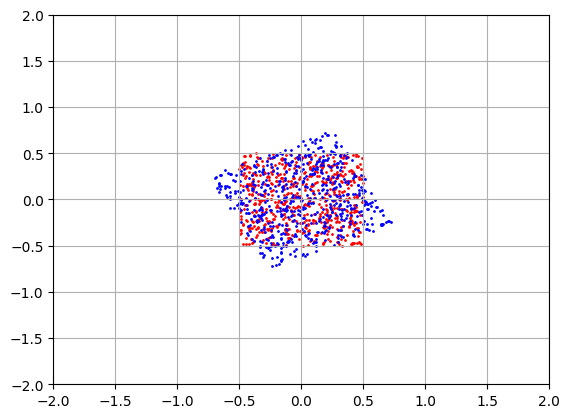

In [31]:
rotaciona_45 = np.array([ [1, -0.5], [0.5, 1] ]) #Rotaciona 90 graus

x = np.random.uniform(-0.5, 0.5, size=(2, 600))

y = rotaciona_45 @ x
plt.figure()
plt.scatter(x[0,:], x[1,:], s=1, c='r')
plt.scatter(y[0,:], y[1,:], s=1, c='b')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.grid()
plt.show()

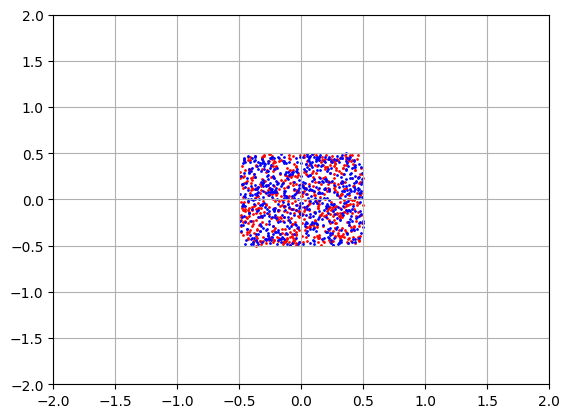

In [32]:
rotaciona_180 = np.array([ [-1, 0], [0, -1] ]) #Rotaciona 180 graus

x = np.random.uniform(-0.5, 0.5, size=(2, 600))

y = rotaciona_180 @ x
plt.figure()
plt.scatter(x[0,:], x[1,:], s=1, c='r')
plt.scatter(y[0,:], y[1,:], s=1, c='b')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.grid()
plt.show()

3 dimensoes

$$
rotacao = 
\begin{bmatrix}
    \cos(\theta) & -\sin(\theta) & 0 \\
    \sin(\theta) & \cos(\theta) & 0 \\
    0 & 0 & 1
\end{bmatrix}
$$

$$
translacao = 
\begin{bmatrix}
    1 & 0 & \Delta x \\
    0 & 1 & \Delta y \\
    0 & 0 & 1
\end{bmatrix}
$$

$$
cisalhamento_x = 
\begin{bmatrix}
    1 & n & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1
\end{bmatrix}
$$

$$
cisalhamento_y = 
\begin{bmatrix}
    1 & 0 & 0 \\
    n & 1 & 0 \\
    0 & 0 & 1
\end{bmatrix}
$$

$$
compressao_x = 
\begin{bmatrix}
    0.n & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1
\end{bmatrix}
$$

$$
compressao_y = 
\begin{bmatrix}
    1 & 0 & 0 \\
    0 & 0.n & 0 \\
    0 & 0 & 1
\end{bmatrix}
$$
$$
zoom = 
\begin{bmatrix}
    Nx & 0 & 0 \\
    0 & Ny & 0 \\
    0 & 0 & 1
\end{bmatrix}
$$

## Transformando Imagens

In [33]:
# Funcao para criar os indices de cada pixel da imagem

# min_i = menor valor da altura
# max_i = maior valor da altura
# min_j = menor valor da largura
# max_j = maior valor da largura

def criar_indices(min_i, max_i, min_j, max_j):
    import itertools
    L = list(itertools.product(range(min_i, max_i), range(min_j, max_j)))
    idx_i = np.array([e[0] for e in L])
    idx_j = np.array([e[1] for e in L])
    idx = np.vstack( (idx_i, idx_j) )
    return idx

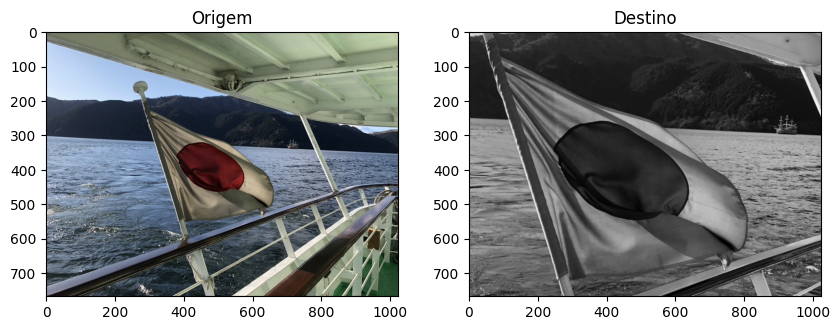

(768, 1024, 3)


In [34]:
image = mpimg.imread("imagem.jpeg")

# Cria matrizes com valores 0 de acordo com o formato da imagem
image_ = np.zeros_like(image)

Xd = criar_indices(0,768, 0, 1024)

# Adiciona uma dimensao na matriz da imagem para que seja possivel aplicar translacoes
Xd = np.vstack((Xd, np.ones(Xd.shape[1])))


# Matriz que posiciona o centro da imagem no ponto (0,0)
matriz_translacao = np.array([[1, 0 ,-(image.shape[0]/ 2)], [0, 1, -(image.shape[1]/ 2)], [0, 0, 1]])

# Matriz que aumenta o tamanho da imagem em 4x, 2x na largura e 2x na altura
matriz_zoom = np.array([[2, 0 ,0], [0, 2, 0], [0, 0, 1]])

# A matriz A leva imagem para (0,0) e aplica zoom(aumenta tamanho)
A = matriz_translacao @ matriz_zoom

# A matriz X leva imagem para (0,0), aplica zoom(aumenta tamanho) e coloca a imagem na posicao original
X = np.linalg.inv(A) @ Xd
Xd = Xd.astype(int)

# Filtro para que os pixeis que estejam fora da area de exibicao sejam descartado
filtro = (Xd[0,:] < 768) & (Xd[1,:] < 1024)
Xd = Xd[:, filtro]
X = X[:, filtro]
X = X.astype(int)

image_[Xd[0,:], Xd[1,:], :] = image[X[0,:], X[1,:], :]

altura, largura, cores = image_.shape

# Matriz que transforma a cor da imagem de RGB para YIQ
A = np.array( [[0.299, 0.587, 0.144], [0.5959, -0.2746, -0.3213], [0.2115, -0.5227, 0.3112]] )

# Matriz que transforma a a cor da imagem de RGB para YIQ, deixa em preto e branco e transforma a cor da imagem de YIQ para RGB
T = np.linalg.inv(A) @ np.array([[1, 0, 0], [0, 0, 0], [0, 0, 0]]) @ A

X = image_.reshape(altura*largura, cores).T

#Aplica a transformacao de cor
X_ = T @ X

image_ = X_.T.reshape(altura, largura, cores).astype(int)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Origem')
plt.subplot(1,2,2)
plt.imshow(image_)
plt.title('Destino')
plt.show()

print(image.shape)

### Matrizes importantes de cor

In [35]:
A = np.array( [[0.299, 0.587, 0.144], [0.5959, -0.2746, -0.3213], [0.2115, -0.5227, 0.3112]] )

apenas_componente_r = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 1]])
apenas_componente_g_e_b = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 0]])
preto_e_branco_yiq = np.linalg.inv(A) @ np.array([[1, 0, 0], [0, 0, 0], [0, 0, 0]]) @ A
escurece_yiq = np.linalg.inv(A) @ np.array([[0.5, 0, 0], [0, 1, 0], [0, 0, 1]]) @ A
distorce_iq = np.linalg.inv(A) @ np.array([[1, 0, 0], [0, 0, 1], [0, 1, 0]]) @ A
volta_ao_normal = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])


## Encontrar uma matriz que transforma diferentes pontos

[[ 0.66849315  1.34491762  0.93718858 ...  1.31938498  0.86582478
   1.48469639]
 [ 0.49478687 -0.53501252  0.11104239 ... -0.32396855  0.25883243
  -0.65985044]]
[[ 2. -2.  1.]
 [-3.  2.  0.]
 [ 0.  0.  1.]]


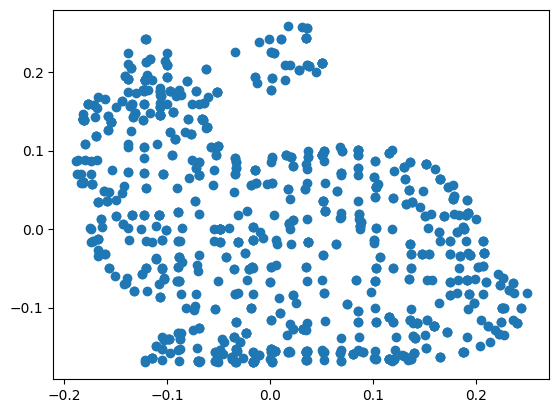

In [36]:
df = pd.read_csv('point_cloud.csv')
points = df.to_numpy().T
points_3d = np.vstack((points, np.ones(points.shape[1])))

v1 = np.array([1, 0])
v2 = np.array([-1, 2])
v3 = np.array([-1, 1])

v = np.vstack([v1, v2, v3]).T
v = np.vstack((v, np.ones(v.shape[1])))

w1 = np.array([0, 0])
w2 = np.array([0, 1])
w3 = np.array([1, 2])

w = np.vstack([w1, w2, w3]).T
w = np.vstack((w, np.ones(w.shape[1])))

B = v @ np.linalg.inv(w)

points = np.linalg.inv(B) @ points_3d

print(B)
plt.figure()
plt.scatter(points[0, :], points[1,:])
plt.show()

$\odot$
Esse simbolo significa multiplicacao de ponto a ponto, apenas use * nas multiplicacoes ao inves de @